In [119]:
import requests
import json
import os

import pandas as pd
from fpdf import FPDF
import seaborn as sns

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from webptools import dwebp, grant_permission
from PIL import Image, ImageFont, ImageDraw, ImageOps
from utils import get, get_season_data, get_team_data, get_team_season_data, \
    create_df, create_plot

grant_permission()

fpl_id = 2024013
current_gw = 26


    



def create_report(fpl_id, current_gw):
    
    data = get_team_data(fpl_id, current_gw)
    W, H = (595, 842)    
    pdf = FPDF('P', 'pt', 'A4')
    pdf.add_page()

    # Add background image
    pdf.image('base_image.png', 0, 0, w=595)

    # Font settings
    pdf.set_text_color(255, 255, 255)
    pdf.add_font('RadikalBold', '', 'RadikalBold.ttf', uni=True)
    pdf.set_font('RadikalBold', '', 1)
    pdf.set_font_size(12)
    
    # Print rank
    team_name = 'De Bruynevirus'
    rank = data['entry_history']['overall_rank']
    score = data['entry_history']['total_points']
    
    # Add player jerseys
#     pdf.image('jerseys/arsenal.png', 480, 75, w=50)
#     pdf.image('jerseys/manchester-united.png', 560, 75, w=50)
#     pdf.image('jerseys/aston-villa-gk.png', 640, 75, w=50)
#     pdf.image('sample-out.png', 700, 75, w=100)
    
    
    
                                  
#     for i in range(0, 600, 50):
#         for j in range(0, 800, 50):
#             pdf.set_xy(i, j)
#             pdf.cell(2, txt='i: %s, j: %s' %(i, j))

    
    pdf.set_xy(290, 150)
    pdf.cell(2, txt='Team Name:    %s' %(team_name))
    
    pdf.set_xy(290, 165)
    pdf.cell(2, txt='Total Points:    %s' %(score))
    
    pdf.set_xy(290, 180)
    pdf.cell(2, txt='Overall Rank:    %s' %(rank))
    
    w=350
    pdf.image('fig1.png',(W-w)/2, 250, w=w)
    
    
                                  
    
    
    
    pdf.output('report.pdf', 'F')



In [120]:

from matplotlib.ticker import FuncFormatter
# fpl_df = get_team_season_data(fpl_id)
# create_plot(fpl_df)
create_report(fpl_id, current_gw)

In [121]:
fpl_df.iloc[0]['picks']

[{'element': 70,
  'position': 1,
  'multiplier': 1,
  'is_captain': False,
  'is_vice_captain': False},
 {'element': 259,
  'position': 2,
  'multiplier': 1,
  'is_captain': False,
  'is_vice_captain': False},
 {'element': 375,
  'position': 3,
  'multiplier': 1,
  'is_captain': False,
  'is_vice_captain': False},
 {'element': 239,
  'position': 4,
  'multiplier': 1,
  'is_captain': False,
  'is_vice_captain': False},
 {'element': 4,
  'position': 5,
  'multiplier': 2,
  'is_captain': True,
  'is_vice_captain': False},
 {'element': 254,
  'position': 6,
  'multiplier': 1,
  'is_captain': False,
  'is_vice_captain': True},
 {'element': 370,
  'position': 7,
  'multiplier': 1,
  'is_captain': False,
  'is_vice_captain': False},
 {'element': 338,
  'position': 8,
  'multiplier': 1,
  'is_captain': False,
  'is_vice_captain': False},
 {'element': 184,
  'position': 9,
  'multiplier': 1,
  'is_captain': False,
  'is_vice_captain': False},
 {'element': 117,
  'position': 10,
  'multiplier':

In [116]:


# pass input_image(.webp image) path ,output_image(.jpeg,.pnp .....)
dwebp(input_image="test.webp", output_image="pythondude.png",
            option="-o")


{'exit_code': 255,
 'stdout': b'',
 'stderr': b"cannot open input file 'test.webp'\n",
 'command': '/home/lev/dsenv/lib/python3.8/site-packages/lib/libwebp_linux/bin/dwebp test.webp -o pythondude.png -v'}

In [140]:
def download_assets(teams_df):
    
    folder = "assets/jerseys"

    team_info = dict(teams_df[['code', 'name']].values)
    os.chdir(folder)

    for team_number in team_info.keys():

        team_name = team_info[team_number].lower().replace(" ","-")

        
        url = 'https://fantasy.premierleague.com/dist/' \
            'img/shirts/standard/shirt_%s-110.webp' % (team_number)
        
        url_gk = 'https://fantasy.premierleague.com/dist/' \
            'img/shirts/standard/shirt_%s_1-110.webp' % (team_number)
        
        gk = False
        
        for link in [url, url_gk]:
            r = requests.get(link, allow_redirects=True)
            open('jersey.webp', 'wb').write(r.content)
            
            if gk:
                output_image = team_name + '-gk.png'
            else:
                output_image = team_name + '.png'
            dwebp(input_image="jersey.webp", output_image=output_image,
                    option="-o")
            gk = True
        os.remove('jersey.webp')
    os.chdir('../..')
    

download_assets(teams_df)

In [123]:
players_df, teams_df, events_df, response = get_season_data()

In [ ]:
players_df.columns

In [ ]:
players_df[['event_points', 'web_name']]

In [ ]:
events_df

In [ ]:
def get_team_season_data(fpl_id):
    
    season_data = {}
    for gw in range(1, 38):
        week_label = 'week_%s'  % (gw)
        
        try:
            team_data = get_team_data(fpl_id, gw)
            team_data['entry_history']['active_chip'] = team_data['active_chip']
            team_data['entry_history']['automatic_subs'] = team_data['automatic_subs']
            
            point_data = pd.read_csv('gws/gw%s.csv' % (gw))
            
            for i, pick in enumerate(team_data['picks']):
                
                player = pick['element']
                captain = pick['is_captain']
                points = point_data[point_data['element'] == player]['total_points'][0]
                team_data['entry_history']['player_%s' % (i+1)] = (player, captain, points)
                
                
            season_data[week_label] = team_data['entry_history']
            
        except:
            print('no data for gameweek %f' % (int(gw)))
    return season_data

def unpack_picks(pick_data):
    players = [pick['element'] for pick in pick_data]
    return players
gw = 2
point_data = pd.read_csv('gws/gw%s.csv' % (gw))  


In [ ]:
team_data = get_team_season_data(fpl_id)

In [ ]:
create_df(team_data)

In [ ]:
fpl_df.iloc[9]


In [ ]:
fpl_df.iloc[9]

In [ ]:
players_df[players_df['id'] == 197]['web_name']

In [ ]:
for item in [pick['element'] for pick in fpl_df.iloc[0]['picks']]:
    player = players_df[players_df['id'] == item]
    print(player['web_name'].values[0])

In [ ]:
fpl_df.iloc[0]


In [ ]:
fpl_df.columns

In [112]:


def make_player_image(name, team):
    img = Image.open("jerseys/%s.png" %(team))
    font = ImageFont.truetype("RadikalBold.ttf", 30)
    W, H = img.size
    border = 200
    img = ImageOps.expand(img, border=border)

    draw = ImageDraw.Draw(img)
    w, h = draw.textsize(name, font=font)
    draw.rectangle((((border+W/2) - 3*w/4, H+border+20),
                    ((border+W/2) + 3*w/4, H+border+h+25)), fill=(0,117,57))
    draw.text(((border+W/2)- w/2, H+border+20), name, fill="white", font=font)
    img = ImageOps.fit(img, size=(round(img.size[0]*0.8), round(img.size[1]*0.8)), bleed=0.2)
    img.save('image.png')

make_player_image('Aubameyang', 'arsenal')

In [106]:
def create_plot(fpl_df):
    
    sns.set_theme()
    sns.set_style("dark")
    fig, ax1 = plt.subplots(figsize=(12,8))
    font = fm.FontProperties(fname='RadikalBold.ttf')
    
    plt.ticklabel_format(style='plain', axis='both', scilimits=(0,0))
    
    g = sns.lineplot(data=fpl_df['overall_rank'], linewidth=3,
                     color="r", ax=ax1, label='Overall')
    ax1.get_yaxis().set_major_formatter(
        FuncFormatter(lambda x, p: format(int(x), ',')))
    ax2 = plt.twinx()
    
    plt.ticklabel_format(style='plain', axis='both', scilimits=(0,0))
    g2 = sns.lineplot(data=fpl_df['rank'], linewidth=3,
                      color="b", ax=ax2, label='Gameweek')
    ylabels = ['{}'.format(x) + 'M' for x in g.get_yticks()/1000000]
    g.set_yticklabels(ylabels)
    ylabels2 = ['{}'.format(x) + 'M' for x in g2.get_yticks()/1000000]
    g2.set_yticklabels(ylabels2)
    
    ax1.set_ylabel('Overall Rank', fontproperties=font, fontsize=18)
    ax2.set_ylabel('Gameweek Rank', fontproperties=font, fontsize=18)
    ax2.set_xlabel('Gameweek', fontproperties=font, fontsize=20)
    ax1.set_xlabel('Gameweek', fontproperties=font, fontsize=20)

    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    
    ax1.legend(h1+h2, l1+l2, prop={'size': 15})
    ax2.legend(h1+h2, l1+l2, prop={'size': 15})    
    
    plt.savefig('fig1.png', dpi=300)

<ipython-input-106-f029d2d365ce>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels)
<ipython-input-106-f029d2d365ce>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_yticklabels(ylabels2)


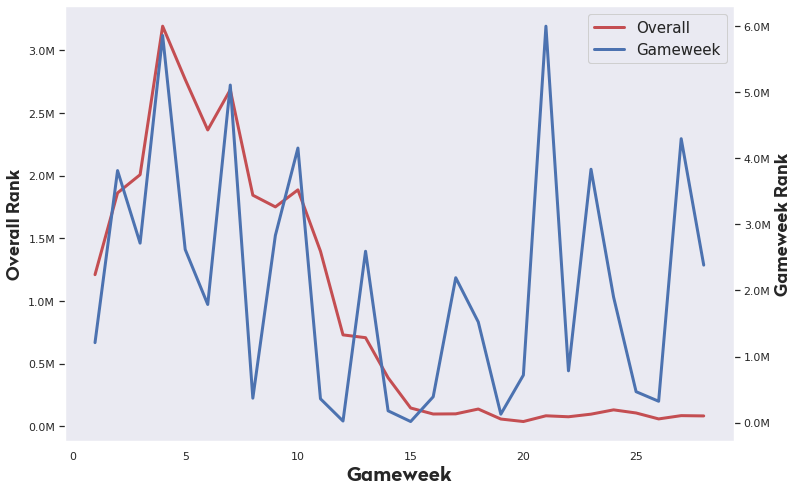

In [107]:
create_plot(fpl_df)

In [128]:
players_df['code']

0       37605
1       39476
2       41270
3       54694
4       58822
        ...  
681    448487
682    209353
683    465551
684     73314
685    490721
Name: code, Length: 686, dtype: int64

In [129]:
teams_df.columns

Index(['code', 'draw', 'form', 'id', 'loss', 'name', 'played', 'points',
       'position', 'short_name', 'strength', 'team_division', 'unavailable',
       'win', 'strength_overall_home', 'strength_overall_away',
       'strength_attack_home', 'strength_attack_away', 'strength_defence_home',
       'strength_defence_away', 'pulse_id'],
      dtype='object')

In [136]:
for i in dict(teams_df[['code', 'name']].values).keys():
    print(i)

3
7
36
90
8
31
11
54
13
2
14
43
1
4
49
20
6
35
21
39
